In [48]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [41]:
image_path= "../output_videos/cropped_img.jpg"
image=cv2.imread(image_path)
image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

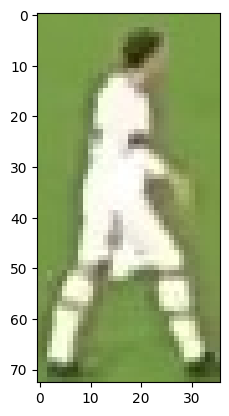

In [42]:
plt.imshow(image)
plt.show()

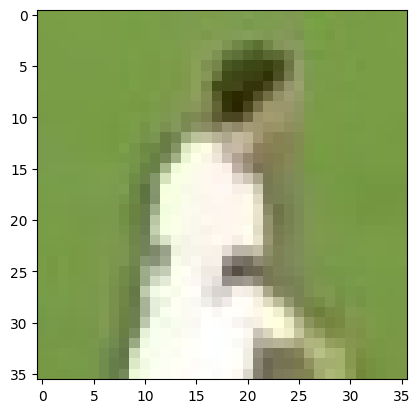

In [45]:
#take top half of image
top_half_image=image[0: int(image.shape[0]/2),:]
plt.imshow(top_half_image)
plt.show()

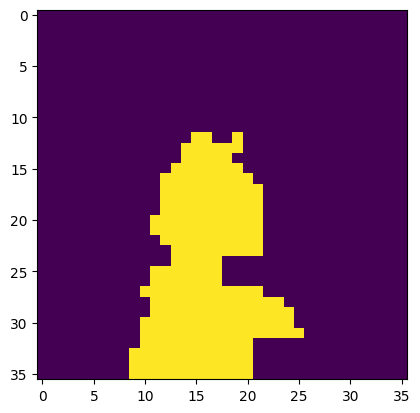

In [53]:
#Cluster the image into 2 clusters
#1 reshape image in 2d array
image_2d= top_half_image.reshape(-1,3)

#perform kmeans 
kmeans= KMeans(n_clusters=2,random_state=0).fit(image_2d)

#get the cluster labels
labels= kmeans.labels_

#reshape to be an image
clustered_image=labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

#display image

plt.imshow(clustered_image)
plt.show()


In [54]:
corner_clusters= [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster= max(set(corner_clusters),key=corner_clusters.count)
print(non_player_cluster)

0


In [55]:
player_cluster = 1+non_player_cluster
print(player_cluster)

1


In [56]:
kmeans.cluster_centers_[player_cluster]

array([241.95780591, 241.3164557 , 226.45147679])